In [86]:
# import several useful package

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import csv

In [87]:
data = pd.read_csv("breast_cancer_data.csv")
data.shape

(698, 9)

In [88]:
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open("breast_cancer_data.csv", "r"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:8]
    y = data[:,8]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

In [89]:
X, y = load_data(1)
X.shape

(9, 699)

In [177]:
# softmax_gradient
def softmax_grad(X, y, w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(np.asarray(w0))
    cost = softmaxval(X, y, w0)
    cost_path.append(cost)
    w = w0
    mis_classification = []
    accuracy = []
    # start gradient descent loop
    max_its = 100
    alpha = 10**(-5)
    for k in range(max_its):
        # YOUR CODE GOES HERE - compute gradient
        grad = grad_softmax(X, y, w)
        # take gradient step
        w = w - alpha*grad

        # update path containers
        # print("the",k, "th iteration would bring value of w as:", w)
        w_path.append(w)
        # print("This time, the w_path equal to:", w_path)
        cost = softmaxval(X, y, w)
        # print("the",k, "th iteration would bring value of cost as:", cost)
        cost_path.append(cost)
        # print("This time, the c_path equal to:", cost_path)
        mis_cl, accuracy_ = accuracy_score(X, y, w)   
        mis_classification.append(mis_cl)
        accuracy.append(accuracy_)
        
    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (int(np.shape(w_path)[0]),9)
        
    cost_path = np.asarray(cost_path)
    cost_path.shape = (np.size(cost_path),1)
    return w_path,cost_path, mis_classification, accuracy
def softmax(X, y, w):
    X_trans = X.T
    grad = np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))-np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))
    for i in range(len(X_trans)):
        grad += np.log(1 + np.exp(-y[i]*np.multiply(X_trans[i], w)))
    return grad

def softmaxval(X, y, w):
    X_trans = X.T
    grad = np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))-np.log(1 + np.exp(-y[0]*np.multiply(X_trans[0], w)))
    for i in range(len(X_trans)):
        grad += np.log(1 + np.exp(-y[i]*np.multiply(X_trans[i], w)))
    return sum(grad)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_softmax(X, y, w):
    X_trans = X.T    
    grad = -np.multiply(sigmoid(-y[0]*np.multiply(X_trans[0], w)),y[0]*X[:,0]) + np.multiply(sigmoid(-y[0]*np.multiply(X_trans[0], w)),y[0]*X[:,0])     
    for i in range(len(X_trans)):
        grad += -np.multiply(sigmoid(-y[i]*np.multiply(X_trans[i], w)),y[i]*X[:,i])
    return grad
def y_predict(X, y, w):
    y_pred = np.dot(X.T, w)
    for i in range(len(y_pred)):
        if y_pred[i] >= 0:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

def accuracy_score(X, y, w):
    y_pred = y_predict(X, y, w)
    mis_classification = 0
    accuracy_score = 0
    for i in range(len(y_pred)):
        if y_pred[i] != y[i]:
            mis_classification += 1
    accuracy_score = mis_classification/ len(y_pred)
    return mis_classification, accuracy_score

In [182]:
# squared_margin_grad
def squared_margin_grad(X, y, w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(np.asarray(w0))
    cost = squared_margin(X, y, w0)
    cost_path.append(cost)
    w = w0
    mis_classification = []
    accuracy = []
    # start gradient descent loop
    max_its = 100
    alpha = 10**(-5)
    for k in range(max_its):
        # YOUR CODE GOES HERE - compute gradient
        grad = grad_squared_margin(X, y, w)
        # take gradient step
        w = w - alpha*grad

        # update path containers
        # print("the",k, "th iteration would bring value of w as:", w)
        w_path.append(w)
        # print("This time, the w_path equal to:", w_path)
        cost = squared_margin(X, y, w)
        # print("the",k, "th iteration would bring value of cost as:", cost)
        cost_path.append(cost)
        # print("This time, the c_path equal to:", cost_path)
        mis_cl, accuracy_ = accuracy_score(X, y, w)   
        mis_classification.append(mis_cl)
        accuracy.append(accuracy_)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (int(np.shape(w_path)[0]),9)
        
    cost_path = np.asarray(cost_path)
    cost_path.shape = (np.size(cost_path),1)

    return w_path,cost_path, mis_classification, accuracy  
def squared_margin(X, y, w):
    X_trans = X.T
    grad = 0
    for i in range(len(X_trans)):
        for k in range(9):
            grad += (max(0, (1- y[i]*np.multiply(X_trans[i][k], w[k]))))**2
    return grad

def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_squared_margin(X, y, w):
    X_trans = X.T    
    grad = np.zeros(9)
    for k in range(9):
        for i in range(len(X_trans)):
            grad[k] += 2 * np.multiply(max(0, (1- y[i]*np.multiply(X_trans[i][k], w[k]))), y[i]*X[:,i][k])
    return grad

def y_predict(X, y, w):
    y_pred = np.dot(X.T, w)
    for i in range(len(y_pred)):
        if y_pred[i] >= 0:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

def accuracy_score(X, y, w):
    y_pred = y_predict(X, y, w)
    mis_classification = 0
    accuracy_score = 0
    for i in range(len(y_pred)):
        if y_pred[i] != y[i]:
            mis_classification += 1
    accuracy_score = mis_classification/ len(y_pred)
    return mis_classification, accuracy_score

In [186]:
# load in data
X,y = load_data('breast_cancer_data.csv')
ini = 0.000001
w0 = np.array([ini,ini,ini,ini,ini,ini,ini,ini,ini])
w0.shape = (9,1)
# run gradient descent
w1, cost1, mis1, acc1 = softmax_grad(X,y,w0)
w2, cost2, mis2, acc2 = squared_margin_grad(X,y,w0)
# w2, cost2 = squared_margin_grad(X,y,w0)

# plot points and separator


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<function matplotlib.pyplot.show(*args, **kw)>

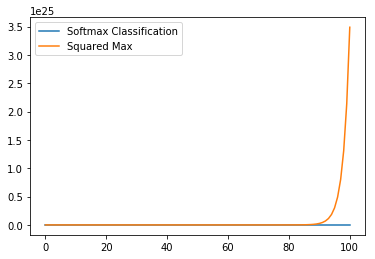

In [184]:
plt.plot(cost1, label = 'Softmax Classification')
plt.plot(cost2, label = 'Squared Max')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

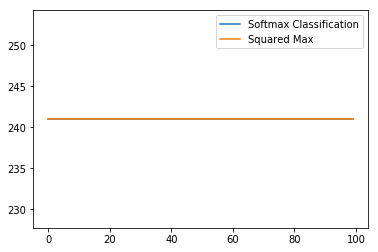

In [185]:
plt.plot(mis1, label = 'Softmax Classification')
plt.plot(mis2, label = 'Squared Max')
plt.legend()
plt.show

In [145]:
w1[-1]

array([ 0.01076508, -0.0153856 , -0.04215344, -0.03969407, -0.03144485,
       -0.01359145, -0.02087076, -0.0358916 , -0.00656309])

In [ ]:
def softmax_accuracy(X, y, w1):
    w = w1[-1]
    y_test = y
    